<a href="https://colab.research.google.com/github/Akanksha200008/Advance-Mathematical-Statistics/blob/main/Project6_Minkowski_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(1) Plot these 200 points with the points labelled -1 as blue points, and the points labelled 1 as red points.

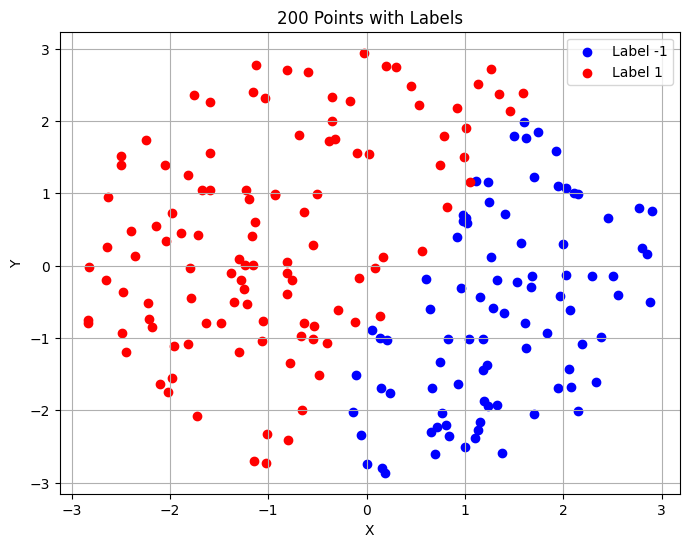

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset from the URL
def load_data(url):
    data = pd.read_csv(url)
    # Assuming the CSV has columns: x, y, label
    x = data['x']
    y = data['y']
    labels = data['label']
    return x, y, labels

# Plot points with labels
def plot_points(x, y, labels, title="Scatter Plot"):
    plt.figure(figsize=(8, 6))
    for label, color in zip([-1, 1], ['blue', 'red']):
        plt.scatter(x[labels == label], y[labels == label], label=f'Label {label}', color=color)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid()
    plt.show()

# URL of the CSV file
url_200 = "https://raw.githubusercontent.com/Akanksha200008/Advance-Mathematical-Statistics/refs/heads/main/200-labelled-points-in-r5e2.csv"

# Load data
x_200, y_200, labels_200 = load_data(url_200)

# Plot the points
plot_points(x_200, y_200, labels_200, title="200 Points with Labels")


(2) Does your plot suggest the two classes of points (labelled – 1 or 1) are linearly separable?                                                               
No, the plot does not suggest the two classes of points are linearly separable.
The data points are mixed at some point, they are not completely seperate.This indicates that a linear classifier would likely not be able to accurately classify these data points.

     

3) Plot the convex hulls of the two classes of labelled points. Are the convex hulls disjoint? Does this suggest the two classes of labeled points can be linearly separated?

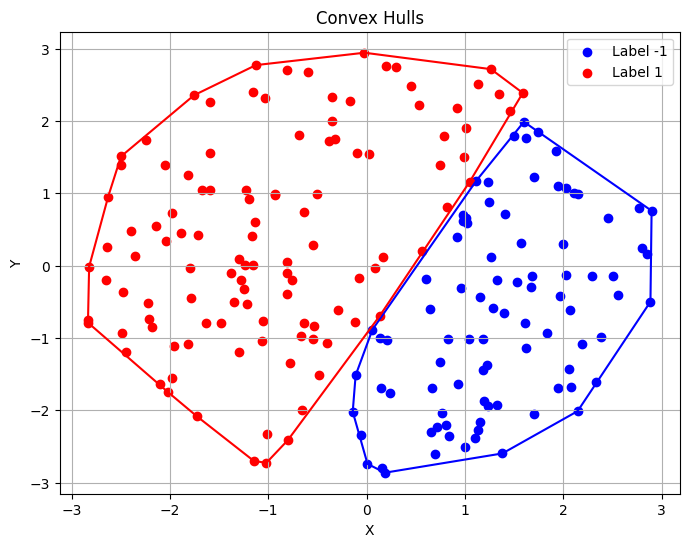

In [ ]:
from scipy.spatial import ConvexHull

# Compute and plot convex hulls
def plot_convex_hulls(x, y, labels):
    plt.figure(figsize=(8, 6))
    for label, color in zip([-1, 1], ['blue', 'red']):
        group_x = x[labels == label]
        group_y = y[labels == label]
        points = np.column_stack((group_x, group_y))
        hull = ConvexHull(points)
        plt.scatter(group_x, group_y, color=color, label=f'Label {label}')
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], color=color)
    plt.title("Convex Hulls")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid()
    plt.show()

# Plot the convex hulls
plot_convex_hulls(x_200, y_200, labels_200)


The blue convex hull (Label -1) and the red convex hull (Label 1) do not overlap. They are disjoint, meaning there is no intersection between them.

Since the convex hulls are disjoint, the two classes can be linearly separated. This means there exists at least one straight line (or hyperplane in higher dimensions) that can perfectly separate the two classes without any misclassification.

(4) A theorem of H. Minkowski says that if K1 and K2 are two disjoint closed and bounded sets in a Euclidean vector space then there is a hyperplane H separating them – that is, K1 lies one side of H and K2 lies the other side of H. To find H in R^2 we solve two minimization problems:

(a) Find a point (x1, y1) in K1 that is a minimum distance to all points in K2

(b) Find a point (x2, y2) in K2 that is a minimum distance to all points in K1

We then join (x1, y1) and (x2, y2) by a line segment L, and the hyperplane H is orthogonal to, and passes through the center of, L. We call H the Minkowski hyperplane. Find the Minkowski hyperplane for the convex hulls of the two classes of labelled points.

Closest point in K1 (x1, y1): (1.115, 1.17605)
Closest point in K2 (x2, y2): (1.04671, 1.15885)
Midpoint of the line segment L: [1.0808550000000001, 1.16745]
Minkowski hyperplane: y = -3.970x + 5.459


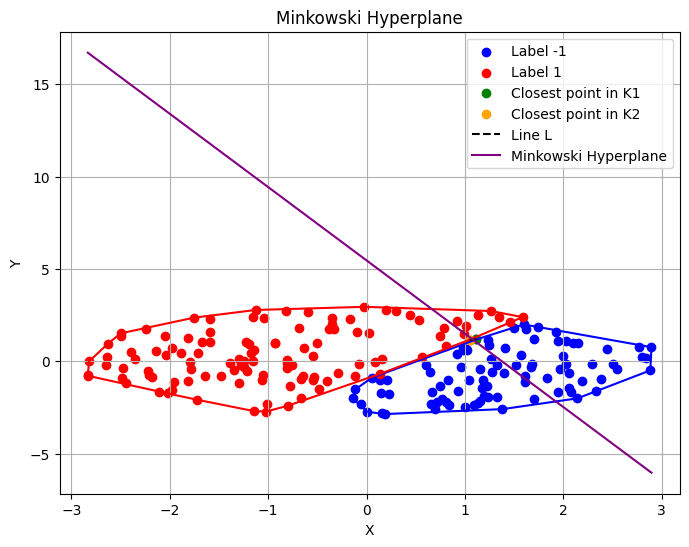

In [ ]:
# Find the closest pair of points between two sets
def find_closest_points(hull1_points, hull2_points):
    min_distance = float('inf')
    closest_pair = (None, None)
    for point1 in hull1_points:
        for point2 in hull2_points:
            dist = np.linalg.norm(point1 - point2)
            if dist < min_distance:
                min_distance = dist
                closest_pair = (point1, point2)
    return closest_pair

# Calculate and plot the Minkowski hyperplane
def minkowski_hyperplane(x, y, labels):
    # Extract points for K1 and K2 based on labels
    K1_points = np.column_stack((x[labels == -1], y[labels == -1]))
    K2_points = np.column_stack((x[labels == 1], y[labels == 1]))

    # Compute convex hulls
    hull1 = K1_points[ConvexHull(K1_points).vertices]
    hull2 = K2_points[ConvexHull(K2_points).vertices]

    # Find closest points between convex hulls
    (x1, y1), (x2, y2) = find_closest_points(hull1, hull2)

    # Calculate midpoint of the line segment L
    midpoint = [(x1 + x2) / 2, (y1 + y2) / 2]

    # Calculate slope of line connecting (x1, y1) and (x2, y2)
    slope = (y2 - y1) / (x2 - x1) if x2 != x1 else None

    # Compute Minkowski hyperplane properties
    if slope is not None:
        orthogonal_slope = -1 / slope
        intercept = midpoint[1] - orthogonal_slope * midpoint[0]
        hyperplane = f"y = {orthogonal_slope:.3f}x + {intercept:.3f}"
    else:
        # Handle vertical line case
        orthogonal_slope = None
        intercept = midpoint[0]
        hyperplane = f"x = {intercept:.3f}"

    # Print results
    print("Closest point in K1 (x1, y1):", (x1, y1))
    print("Closest point in K2 (x2, y2):", (x2, y2))
    print("Midpoint of the line segment L:", midpoint)
    print("Minkowski hyperplane:", hyperplane)

    # Plotting
    plt.figure(figsize=(8, 6))
    for label, color in zip([-1, 1], ['blue', 'red']):
        plt.scatter(x[labels == label], y[labels == label], label=f'Label {label}', color=color)

    # Plot convex hulls
    for hull_points, color in zip([hull1, hull2], ['blue', 'red']):
        for simplex in ConvexHull(hull_points).simplices:
            plt.plot(hull_points[simplex, 0], hull_points[simplex, 1], color=color)

    # Plot closest points and the Minkowski hyperplane
    plt.scatter(x1, y1, color='green', label='Closest point in K1')
    plt.scatter(x2, y2, color='orange', label='Closest point in K2')
    plt.plot([x1, x2], [y1, y2], color='black', linestyle='--', label='Line L')

    if orthogonal_slope is not None:
        x_vals = np.linspace(min(x), max(x), 500)
        y_vals = orthogonal_slope * x_vals + intercept
        plt.plot(x_vals, y_vals, color='purple', label='Minkowski Hyperplane')
    else:
        # Vertical line case
        plt.axvline(intercept, color='purple', label='Minkowski Hyperplane')

    # Finalize plot
    plt.title("Minkowski Hyperplane")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid()
    plt.show()

# Call the function to compute and display the Minkowski hyperplane
minkowski_hyperplane(x_200, y_200, labels_200)


(5) The maximum margin linear separator is the hyperplane (a line in R^2) that separates the two classes of points and maximizes the distance to the nearest data points in each of the two classes. Use quadratic optimization to find the maximum margin linear separator for the two cases of points. How does the maximum margin line differ from the Minkowski line?

SVM Hyperplane Equation: = 2.00x + -0.54


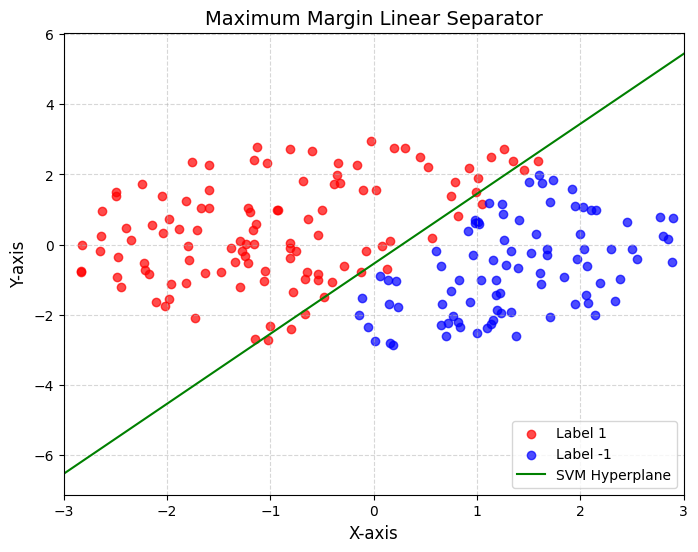

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Standardize the data (using x_200 and y_200 from the previous dataset)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(np.column_stack((x_200, y_200)))  # Standardizing the x and y data
y_labels = labels_200.values  # Using labels_200 directly as labels

# Initialize and train the SVM model with a linear kernel
svm_model = SVC(kernel='linear', C=1e5)
svm_model.fit(X_scaled, y_labels)

# Retrieve the coefficients (w) and intercept (b) for the hyperplane
w_vector = svm_model.coef_[0]
b_intercept = svm_model.intercept_[0]

# Print the hyperplane equation
print(f"SVM Hyperplane Equation: = {-w_vector[0] / w_vector[1]:.2f}x + {-b_intercept / w_vector[1]:.2f}")

# Plot the SVM hyperplane
plt.figure(figsize=(8, 6))

# Plot points with labels
plt.scatter(x_200[labels_200 == 1], y_200[labels_200 == 1], color='red', label='Label 1', alpha=0.7)
plt.scatter(x_200[labels_200 == -1], y_200[labels_200 == -1], color='blue', label='Label -1', alpha=0.7)

# SVM decision boundary
x_vals = np.linspace(-3, 3, 100)
y_vals = -(w_vector[0] * x_vals + b_intercept) / w_vector[1]  # Hyperplane equation

# Plot the decision boundary
plt.plot(x_vals, y_vals, 'g-', label='SVM Hyperplane')  # 'g' specifies green

# Plot customization
plt.title("Maximum Margin Linear Separator", fontsize=14)
plt.xlabel("X-axis", fontsize=12)
plt.ylabel("Y-axis", fontsize=12)
plt.xlim(-3, 3)  # Set x-axis range from -3 to 3
plt.legend(fontsize=10, loc='lower right')  # Move legend to bottom right
plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()


Minkowski Hyperplane:
The Minkowski hyperplane separates the two classes based on the closest points from each convex hull. It is perpendicular to the line connecting these closest points and passes through their midpoint. Its focus is on the geometric relationship of the extreme points but does not consider maximizing the margin.

Maximum Margin Hyperplane:
The Maximum Margin Hyperplane, created by SVM, separates the two classes by maximizing the margin between the nearest points (support vectors) from each class. This approach ensures better generalization and robustness in classification tasks.

The Minkowski hyperplane focuses on convex hull geometry, while the Maximum Margin Hyperplane prioritizes maximizing the margin for optimal separation and classification. Both have different orientations and objectives.

(6) The Excel file “500 labelled points in R^2” contains 500 points (x, y) each with a label: either – 1 or 1. Plot these 500 points with the points labelled -1 as blue points, and the points labelled 1 as red points.

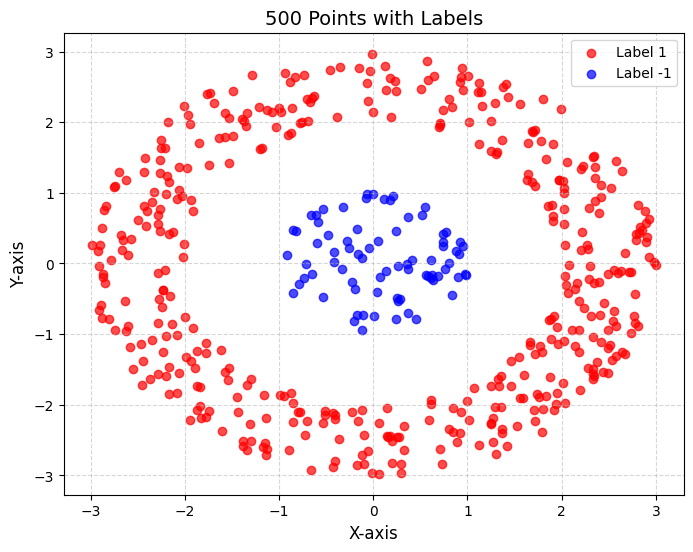

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
def load_data_500(url):
    data = pd.read_csv(url)
    x = data['x']
    y = data['y']
    labels = data['label']
    return x, y, labels

# Plot points with labels
def plot_points(x, y, labels, title="Data Points"):
    """
    Plots the labeled points in 2D space.

    Parameters:
        x (pd.Series): x-coordinates of points.
        y (pd.Series): y-coordinates of points.
        labels (pd.Series): Labels corresponding to each point (-1 or 1).
        title (str): Title for the plot.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(x[labels == 1], y[labels == 1], color='red', label='Label 1', alpha=0.7)
    plt.scatter(x[labels == -1], y[labels == -1], color='blue', label='Label -1', alpha=0.7)

    # Customization
    plt.title(title, fontsize=14)
    plt.xlabel("X-axis", fontsize=12)
    plt.ylabel("Y-axis", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# URL for the 500-point dataset
url_500 = "https://raw.githubusercontent.com/Akanksha200008/Advance-Mathematical-Statistics/refs/heads/main/500-labelled-points-in-r5e2.csv"

# Load the data
x_500, y_500, labels_500 = load_data_500(url_500)

# Plot the data points
plot_points(x_500, y_500, labels_500, title="500 Points with Labels")


(7) Does your plot suggest the two classes of points (labelled – 1 or 1) are linearly separable?
No, the plot does not suggest that the two classes are linearly separable. We cannot draw a line that separates the two classes (label 1 in red and label -1 in blue). For linear separability, the two classes should not overlap, and there should be a line that divides them. However, the overlap in the plot indicates that no such line can separate the classes without errors, meaning they are not linearly separable.

8) Plot the convex hulls of the two classes of labelled points. Are the convex hulls disjoint? Does this suggest the two classes of labeled points can be linearly separated?

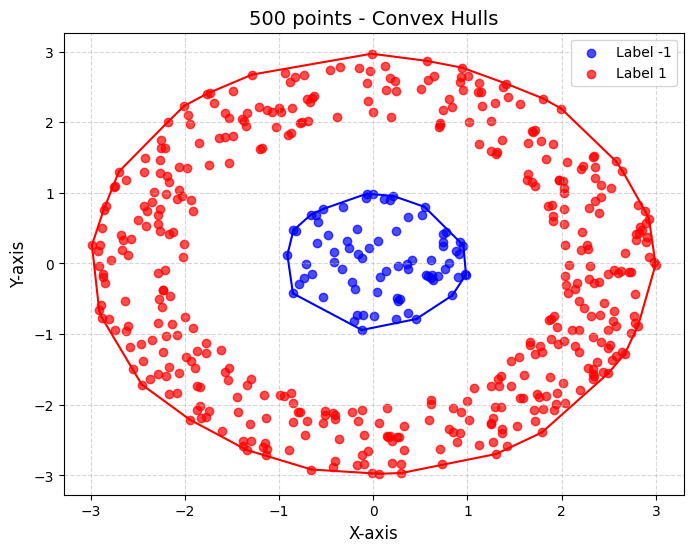

In [ ]:
from scipy.spatial import ConvexHull
import numpy as np

# Function to compute and plot convex hulls
def plot_convex_hulls(x, y, labels):
    plt.figure(figsize=(8, 6))

    for label, color in zip([-1, 1], ['blue', 'red']):
        # Extract points for the current label
        group_x = x[labels == label]
        group_y = y[labels == label]
        points = np.column_stack((group_x, group_y))

        # Compute the convex hull
        hull = ConvexHull(points)

        # Plot points and convex hull boundary
        plt.scatter(group_x, group_y, color=color, label=f'Label {label}', alpha=0.7)
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], color=color, linewidth=1.5)

    # Customization
    plt.title("500 points - Convex Hulls of 2 classes", fontsize=14)
    plt.xlabel("X-axis", fontsize=12)
    plt.ylabel("Y-axis", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Plot the convex hulls for the 500 points
plot_convex_hulls(x_500, y_500, labels_500)


Even though there is some separation between the two sets of points, the presence of one class inside the other (blue points enclosed by red points) strongly suggests that the data is not linearly separable. If the convex hulls were disjoint (there was no overlap between the regions of the red and blue classes), it would indicate that the two classes could be separated by a straight line in 2D. However, in this case, because the convex hulls are overlapping, there isn't a single straight line that could separate the two classes.

(9) Modify these 500 labelled points as (x, y, z, l) in R^3, where z = ||(x, y)|| = sqrt(x^2 + y^2) is the distance of the point (x, y) from the origin (0,0) in R^2. Create a 3D plot of these points (x, y, z) with those labeled -1 as blue, and those labelled 1 as red.

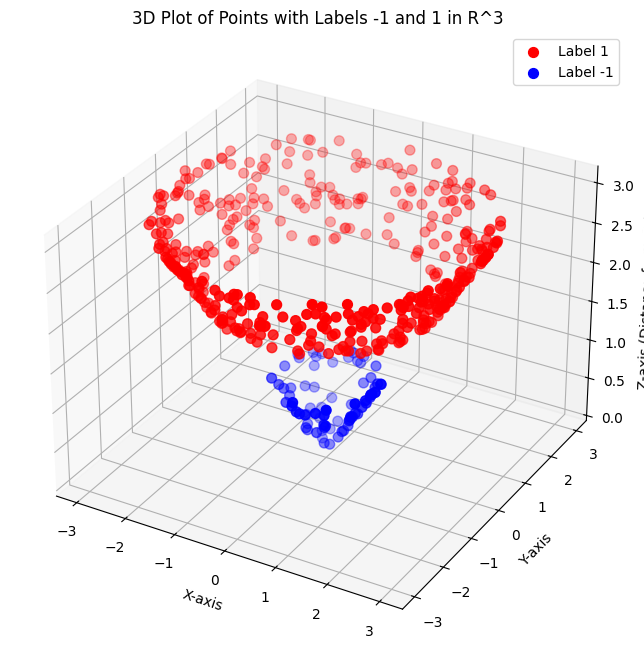

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset (data already loaded previously as x_500, y_500, labels_500)
# Calculate z = sqrt(x^2 + y^2)
z_500 = np.sqrt(x_500**2 + y_500**2)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot points with label 1 (Red) and label -1 (Blue)
ax.scatter(x_500[labels_500 == 1], y_500[labels_500 == 1], z_500[labels_500 == 1], c='red', label='Label 1', s=50)
ax.scatter(x_500[labels_500 == -1], y_500[labels_500 == -1], z_500[labels_500 == -1], c='blue', label='Label -1', s=50)

# Labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis (Distance from Origin)')
ax.set_title('3D Plot of Points with Labels -1 and 1 in R^3')

# Show legend
ax.legend()

# Show plot
plt.show()


(10) Does your plot suggest the two classes of points (x, y, z, l) (labelled – 1 or 1) are linearly separable in R^3?

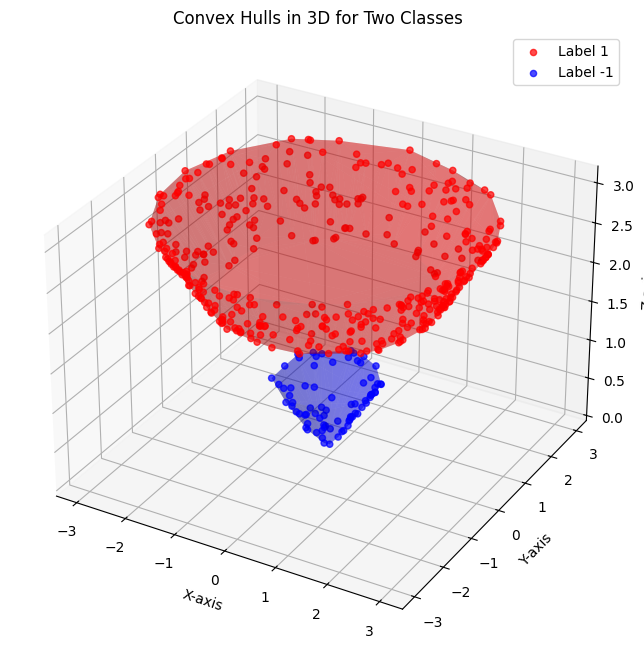

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull

# Load the dataset
url_500 = "https://raw.githubusercontent.com/Akanksha200008/Advance-Mathematical-Statistics/refs/heads/main/500-labelled-points-in-r5e2.csv"
data = pd.read_csv(url_500)

# Calculate z as the distance from the origin (x, y) in 2D plane
data['z'] = np.sqrt(data['x']**2 + data['y']**2)

# Extract points and labels
x_500 = data['x']
y_500 = data['y']
z_500 = data['z']
labels_500 = data['label']

# Separate the points based on labels
points_label_1 = data[data['label'] == 1][['x', 'y', 'z']].values
points_label_minus_1 = data[data['label'] == -1][['x', 'y', 'z']].values

# Function to plot the convex hull for given points
def plot_convex_hull(points, color, label=None):
    if len(points) >= 3:  # Convex hull requires at least 3 points
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            ax.plot_trisurf(points[simplex, 0], points[simplex, 1], points[simplex, 2], color=color, alpha=0.3)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot points labeled with -1 and 1, using different colors
ax.scatter(x_500[labels_500 == 1], y_500[labels_500 == 1], z_500[labels_500 == 1], c='red', label='Label 1', alpha=0.7)
ax.scatter(x_500[labels_500 == -1], y_500[labels_500 == -1], z_500[labels_500 == -1], c='blue', label='Label -1', alpha=0.7)

# Plot convex hulls for both labels
plot_convex_hull(points_label_1, color='red', label='Convex Hull 1')
plot_convex_hull(points_label_minus_1, color='blue', label='Convex Hull -1')

# Set labels for axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Set title
ax.set_title('Convex Hulls in 3D for Two Classes')

# Show legend
ax.legend()

# Display plot
plt.show()


Conclusion: The two classes (Label 1 and Label -1) appear to be linearly separable in 3D. There is a clear separation between the two classes based on their convex hulls, indicating that a hyperplane can be drawn to separate the points of the two classes in 3D space. In a higher-dimensional space (in this case, 3D), when the convex hulls of two classes do not overlap, it suggests that the points from each class can be separated by a plane or surface.

(11) Find, and compare, the Minkowski hyperplane and the maximum margin hyperplane for the two classes of points (x, y, z, l) (labelled – 1 or 1) in R^3.

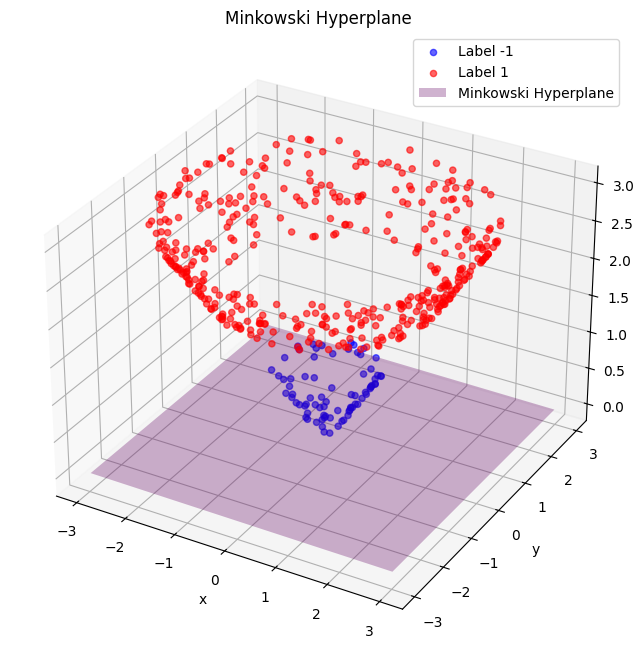

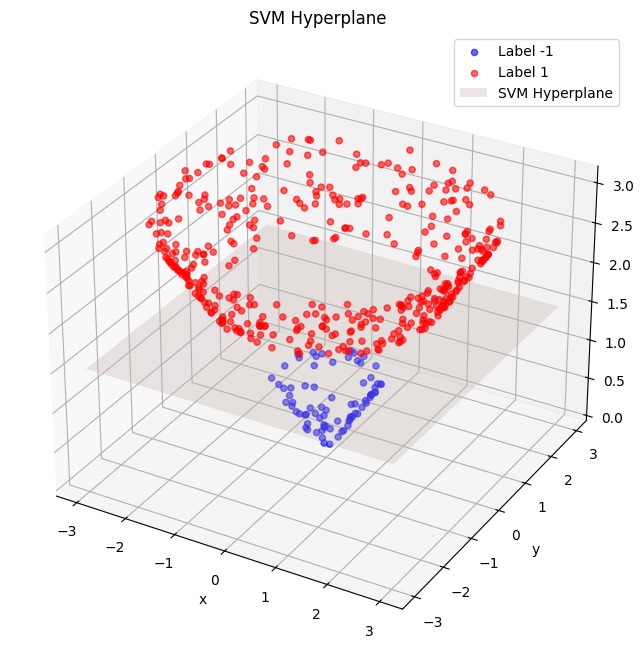

Minkowski Hyperplane Normal Vector:  [0.00371736 0.00123117 0.99999233]
SVM Hyperplane Normal Vector:  [ 0.0056581  -0.00208174  1.96768003]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

# Load the dataset
url_500 = "https://raw.githubusercontent.com/Akanksha200008/Advance-Mathematical-Statistics/refs/heads/main/500-labelled-points-in-r5e2.csv"
data = pd.read_csv(url_500)

# Calculate z as the distance from the origin (x, y) in 2D plane
data['z'] = np.sqrt(data['x']**2 + data['y']**2)

# Extract points and labels
x_500 = data['x']
y_500 = data['y']
z_500 = data['z']
labels_500 = data['label']

# Separate points by label
class_neg1 = data[labels_500 == -1][['x', 'y', 'z']].values
class_pos1 = data[labels_500 == 1][['x', 'y', 'z']].values

# Minkowski Hyperplane function
def minkowski_distance(w):
    """Compute the distance between the two convex hulls along the direction w."""
    w = w / np.linalg.norm(w)  # Normalize the direction vector
    proj_neg1 = np.dot(class_neg1, w)
    proj_pos1 = np.dot(class_pos1, w)
    return np.max(proj_neg1) - np.min(proj_pos1)

# Optimize to find the direction minimizing the distance for Minkowski Hyperplane
res = minimize(minkowski_distance, np.random.rand(3), method='BFGS')
w_minkowski = res.x / np.linalg.norm(res.x)

# Maximum Margin Hyperplane using SVM
X = data[['x', 'y', 'z']].values
y = data['label'].values

# Train a linear SVM
svm = SVC(kernel='linear')
svm.fit(X, y)

# Extract the hyperplane parameters for SVM
w_svm = svm.coef_[0]  # Normal vector
b_svm = svm.intercept_[0]  # Intercept

# Plot 1: Minkowski Hyperplane
fig1 = plt.figure(figsize=(12, 8))
ax1 = fig1.add_subplot(111, projection='3d')

# Scatter plot of points
ax1.scatter(class_neg1[:, 0], class_neg1[:, 1], class_neg1[:, 2], color='blue', label='Label -1', alpha=0.6)
ax1.scatter(class_pos1[:, 0], class_pos1[:, 1], class_pos1[:, 2], color='red', label='Label 1', alpha=0.6)

# Create mesh grid for plotting the hyperplane
xx, yy = np.meshgrid(np.linspace(data['x'].min(), data['x'].max(), 30),
                     np.linspace(data['y'].min(), data['y'].max(), 30))

# Plot Minkowski hyperplane (light green)
zz_minkowski = (-w_minkowski[0] * xx - w_minkowski[1] * yy) / w_minkowski[2]
ax1.plot_surface(xx, yy, zz_minkowski, alpha=0.3, color='purple', rstride=100, cstride=100, label='Minkowski Hyperplane')

# Customize the plot
ax1.set_title('Minkowski Hyperplane')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.legend()

# Show Minkowski Plot
plt.show()

# Plot 2: SVM Hyperplane
fig2 = plt.figure(figsize=(12, 8))
ax2 = fig2.add_subplot(111, projection='3d')

# Scatter plot of points
ax2.scatter(class_neg1[:, 0], class_neg1[:, 1], class_neg1[:, 2], color='blue', label='Label -1', alpha=0.6)
ax2.scatter(class_pos1[:, 0], class_pos1[:, 1], class_pos1[:, 2], color='red', label='Label 1', alpha=0.6)

# Plot SVM hyperplane (light orange)
zz_svm = (-w_svm[0] * xx - w_svm[1] * yy - b_svm) / w_svm[2]
ax2.plot_surface(xx, yy, zz_svm, alpha=0.3, color='mistyrose', rstride=100, cstride=100, label='SVM Hyperplane')

# Customize the plot
ax2.set_title('SVM Hyperplane')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.legend()

# Show SVM Plot
plt.show()

# Print normal vectors of both hyperplanes
print("Minkowski Hyperplane Normal Vector: ", w_minkowski)
print("SVM Hyperplane Normal Vector: ", w_svm)


Minkowski Hyperplane:The hyperplane is almost perpendicular to the z axis, which means it effectively separates the classes based on their distance from the origin along the z dimension. This might be why the hyperplane is so close to the xy-plane in the graph. Effective in controlled environments but can be sensitive to noise

SVM Hyperplane:The SVM hyperplane, on the other hand, has a more nuanced orientation due to the involvement of all three dimensions (x, y, and z). The larger x and z components mean the SVM hyperplane has a greater degree of tilt compared to the Minkowski hyperplane, which could indicate better adaptability in handling more complex boundaries between the classes. Preferred for robustness and better generalization in real-world datasets.

